
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
from keras.datasets import mnist 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy


Using TensorFlow backend.


In [2]:
#  第一步：載入資料並做資料分割
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


11493376/11490434 [==============================] - 1s 0us/step


In [3]:
# 第二步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

# 第三步：構建網絡層
 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

# 輸出模型摘要資訊
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dens

In [0]:
# 第四步：編譯, 
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
# 第五步：訓練, 修正 model 參數
'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 
batch_size= [512,1024]
epochs = [10,20]

history_assembly =[]
for batch in batch_size:
    for epoch in epochs:
        print(f'\n ecochs= {epoch} , batch_size= {batch} \n')
        history = model.fit(X_train,Y_train,batch_size = batch, epochs=epoch, shuffle=True,verbose=2,validation_split=0.3 )
        history_assembly.append(history)
        history = []    


 ecochs= 10 , batch_size= 512 

Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 3s - loss: 2.8749 - acc: 0.8204 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 2/10
 - 1s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 3/10
 - 1s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 4/10
 - 1s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 5/10
 - 1s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 6/10
 - 1s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 7/10
 - 1s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 8/10
 - 1s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 9/10
 - 1s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 10/10
 - 1s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207

 ecochs= 20 , batch_size= 512 

Train

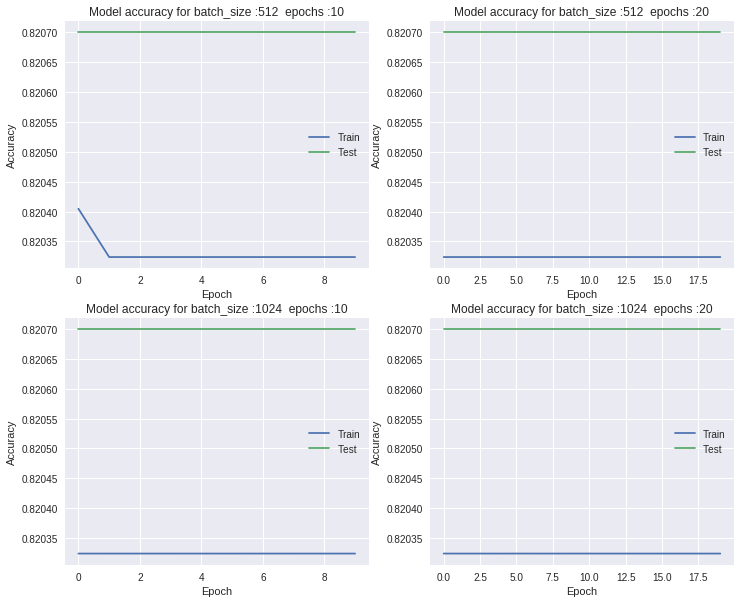

In [6]:
# 第六步：輸出

import matplotlib.pyplot as plt

%matplotlib inline

# Plot training & validation accuracy values
plt.figure(figsize=(12,10))
k=0
for i in range(2):
    for j in range(2):
        plt.subplot(2,2,k+1)
        plt.plot(history_assembly[k].history['acc'])
        plt.plot(history_assembly[k].history['val_acc'])
        plt.title('Model accuracy for ' + 'batch_size :'+ str(batch_size[i]) +'  epochs :' + str(epochs[j]))
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='best')
        k += 1
   
plt.show()

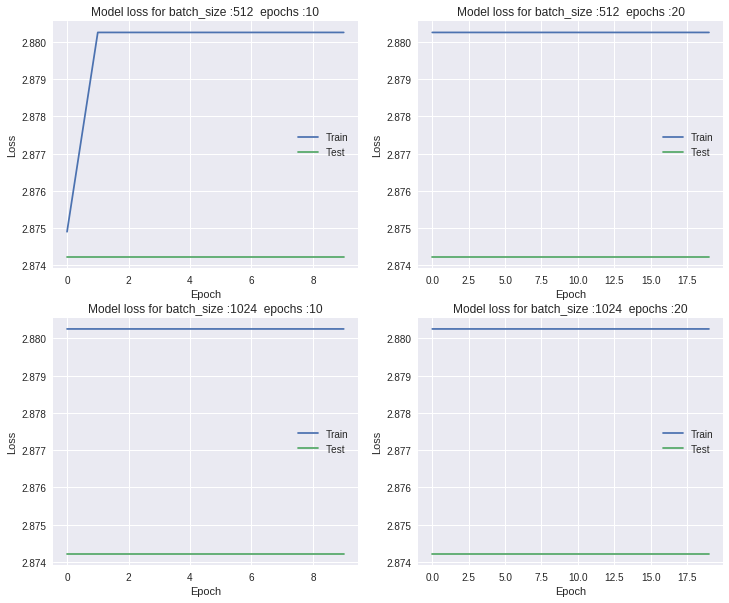

In [7]:
# Plot training & validation loss values
plt.figure(figsize=(12,10))

k = 0
for i in range(2):
    for j in range(2):
        plt.subplot(2,2,k+1)
        plt.plot(history_assembly[k].history['loss'])
        plt.plot(history_assembly[k].history['val_loss'])
        plt.title('Model loss for ' + 'batch_size :'+ str(batch_size[i]) +'  epochs :' + str(epochs[j]))
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='best')
        k+= 1
plt.show()

## 作業二  以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [0]:
def plot_output(history):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
         
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

In [0]:
def fit_model(model,opt):
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    history = model.fit(X_train,Y_train,batch_size = 512, epochs=20, shuffle=True,verbose=2,validation_split=0.3 )
    return history

In [0]:
model = Sequential()

model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 1s - loss: 1.3493 - acc: 0.9007 - val_loss: 0.8598 - val_acc: 0.9313
Epoch 2/20
 - 1s - loss: 0.3402 - acc: 0.9678 - val_loss: 1.6822 - val_acc: 0.8774
Epoch 3/20
 - 1s - loss: 0.2064 - acc: 0.9793 - val_loss: 0.1488 - val_acc: 0.9833
Epoch 4/20
 - 1s - loss: 0.1178 - acc: 0.9865 - val_loss: 0.1345 - val_acc: 0.9846
Epoch 5/20
 - 1s - loss: 0.0903 - acc: 0.9892 - val_loss: 0.7952 - val_acc: 0.9354
Epoch 6/20
 - 1s - loss: 0.0898 - acc: 0.9892 - val_loss: 0.7658 - val_acc: 0.9348
Epoch 7/20
 - 1s - loss: 0.0894 - acc: 0.9894 - val_loss: 0.1075 - val_acc: 0.9870
Epoch 8/20
 - 1s - loss: 0.0519 - acc: 0.9933 - val_loss: 0.3461 - val_acc: 0.9652
Epoch 9/20
 - 1s - loss: 0.0542 - acc: 0.9930 - val_loss: 0.1910 - val_acc: 0.9781
Epoch 10/20
 - 1s - loss: 0.0422 - acc: 0.9944 - val_loss: 0.3167 - val_acc: 0.9686
Epoch 11/20
 - 1s - loss: 0.0392 - acc: 0.9948 - val_loss: 0.0956 - val_acc: 0.9877
Epoch 12/20
 - 1s - loss: 0.0300 - 

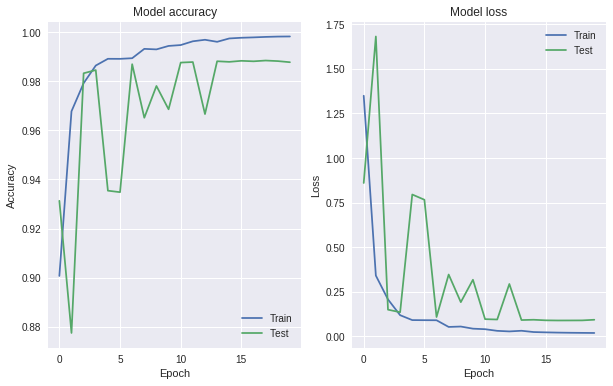

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 1s - loss: 0.6114 - acc: 0.9458 - val_loss: 0.4357 - val_acc: 0.9529
Epoch 2/20
 - 1s - loss: 0.3917 - acc: 0.9587 - val_loss: 0.3770 - val_acc: 0.9609
Epoch 3/20
 - 1s - loss: 0.2100 - acc: 0.9735 - val_loss: 0.0514 - val_acc: 0.9880
Epoch 4/20
 - 1s - loss: 0.0280 - acc: 0.9923 - val_loss: 0.0393 - val_acc: 0.9901
Epoch 5/20
 - 1s - loss: 0.0148 - acc: 0.9957 - val_loss: 0.0367 - val_acc: 0.9913
Epoch 6/20
 - 1s - loss: 0.0096 - acc: 0.9972 - val_loss: 0.0359 - val_acc: 0.9918
Epoch 7/20
 - 1s - loss: 0.0057 - acc: 0.9984 - val_loss: 0.0349 - val_acc: 0.9929
Epoch 8/20
 - 1s - loss: 0.0045 - acc: 0.9987 - val_loss: 0.0366 - val_acc: 0.9927
Epoch 9/20
 - 1s - loss: 0.0032 - acc: 0.9993 - val_loss: 0.0343 - val_acc: 0.9930
Epoch 10/20
 - 1s - loss: 0.0046 - acc: 0.9988 - val_loss: 0.0376 - val_acc: 0.9928
Epoch 11/20
 - 1s - loss: 0.0081 - acc: 0.9978 - val_loss: 0.0386 - val_acc: 0.9925
Epoch 12/20
 - 1s - loss: 0.0079 - 

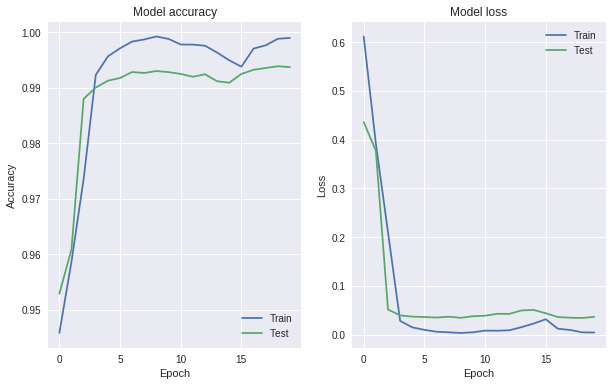

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 1s - loss: 0.0256 - acc: 0.9957 - val_loss: 0.0722 - val_acc: 0.9887
Epoch 2/20
 - 1s - loss: 0.0149 - acc: 0.9970 - val_loss: 0.0449 - val_acc: 0.9928
Epoch 3/20
 - 1s - loss: 0.0139 - acc: 0.9973 - val_loss: 0.0574 - val_acc: 0.9921
Epoch 4/20
 - 1s - loss: 0.0134 - acc: 0.9975 - val_loss: 0.0555 - val_acc: 0.9920
Epoch 5/20
 - 1s - loss: 0.0121 - acc: 0.9977 - val_loss: 0.0478 - val_acc: 0.9931
Epoch 6/20
 - 1s - loss: 0.0119 - acc: 0.9976 - val_loss: 0.0495 - val_acc: 0.9931
Epoch 7/20
 - 1s - loss: 0.0113 - acc: 0.9978 - val_loss: 0.0422 - val_acc: 0.9939
Epoch 8/20
 - 1s - loss: 0.0112 - acc: 0.9978 - val_loss: 0.0562 - val_acc: 0.9926
Epoch 9/20
 - 1s - loss: 0.0097 - acc: 0.9983 - val_loss: 0.0433 - val_acc: 0.9942
Epoch 10/20
 - 1s - loss: 0.0096 - acc: 0.9983 - val_loss: 0.0471 - val_acc: 0.9937
Epoch 11/20
 - 1s - loss: 0.0102 - acc: 0.9981 - val_loss: 0.0474 - val_acc: 0.9939
Epoch 12/20
 - 1s - loss: 0.0098 - 

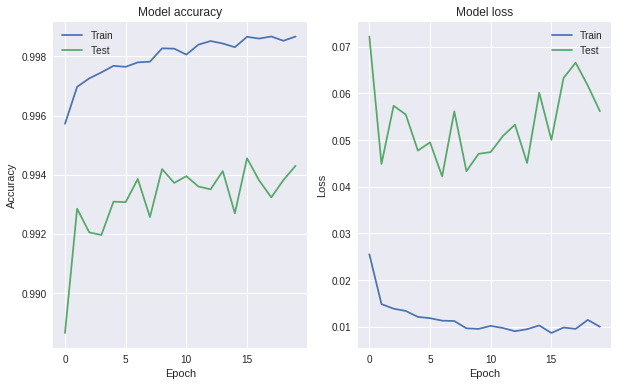

In [11]:
opts=['SGD','Adam','Rmsprop']

for opt in opts:
    history = fit_model(model,opt)
    plot_output(history)